## **Introduction to Knowledge Graph with the `networkx` package in python Part 1**

### What is `networkx`?

`networkx` is a **Python library for creating, manipulating, and analyzing complex networks**. It is widely used for:

* Building **graph-based data structures** (nodes and edges).
* Performing **graph algorithms** (shortest path, centrality, clustering).
* Visualizing small to medium-sized graphs.
* Serving as a foundation for **Knowledge Graph prototyping**.

> Note: `networkx` is ideal for prototyping and small-scale graphs. For production-scale Knowledge Graphs, tools like **Neo4j**, **TigerGraph**, or **Memgraph** are preferred.

> ### **Core Concepts in `networkx`**

#### 1. Graph Types

| Graph Type     | Description                                       |
| -------------- | ------------------------------------------------- |
| `Graph`        | Undirected graph (edges have no direction).       |
| `DiGraph`      | Directed graph (edges have direction).            |
| `MultiGraph`   | Allows multiple edges between the same nodes.     |
| `MultiDiGraph` | Directed graph with multiple edges between nodes. |


#### 2. Nodes

* Represent **entities**.
* Can store metadata (attributes).

In [1]:
import networkx as nx

G = nx.Graph()
print(G.nodes(data=True))

[]


#### Adding a node:
- **Syntax: G(`node`, `attribute_dictionary`)**

- `attribute_dictionary`: Is optional

In [2]:
G.add_node("James", role="Engineer", department="AI")
print(G.nodes(data=True))

[('James', {'role': 'Engineer', 'department': 'AI'})]


#### 3. Edges

* Represent **relationships** between nodes.
* Can also store attributes (e.g., weight, type, timestamp).

**Syntax:** G.add_edges(`u`,`v`, `attribute_dictionary`)

- where u, and v are nodes

In [3]:
# Add more node
G.add_node("Colab Innivation Hub", type="Company")

# Add an edge between two nodes u, v
G.add_edge("James", "Colab Innivation Hub", relation="WORKS_AT", since=2024)
print(G.edges(data=True))

[('James', 'Colab Innivation Hub', {'relation': 'WORKS_AT', 'since': 2024})]


### Let's visualualise the realtionship

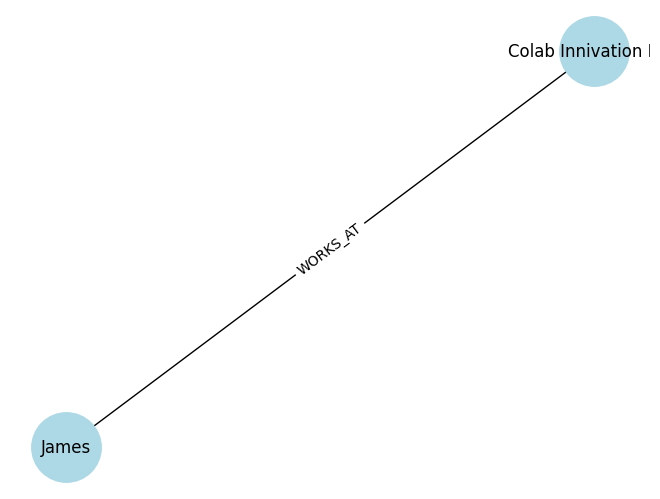

In [4]:
import matplotlib.pyplot as plt

# Layout and draw
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500)

# Add edge labels
labels = {(u, v): d["relation"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

> ### **Basic Operations in `networkx`**

#### 1. Adding Multiple Nodes and Edges

**Multiple node adding Syntax:** 

- G.add_nodes_from([u,v,w])

- where u,v,w can either be a value or a tuple containing a `node` and a `dictionary_attribute`

In [5]:
G.add_nodes_from([
    ("Tobe", {"role": "MLOps"}),
    ("Nanfe", {"role": "Researcher"})
])
print(G.nodes(data=True))

[('James', {'role': 'Engineer', 'department': 'AI'}), ('Colab Innivation Hub', {'type': 'Company'}), ('Tobe', {'role': 'MLOps'}), ('Nanfe', {'role': 'Researcher'})]


In [6]:
G.add_edges_from([
    ("Colab Innivation Hub", "Tobe", {"relation": "WORKS_AT"}),
    ("Colab Innivation Hub", "Nanfe", {"relation": "WORKS_AT"})
])

In [7]:
print(G.edges(data=True))

[('James', 'Colab Innivation Hub', {'relation': 'WORKS_AT', 'since': 2024}), ('Colab Innivation Hub', 'Tobe', {'relation': 'WORKS_AT'}), ('Colab Innivation Hub', 'Nanfe', {'relation': 'WORKS_AT'})]


#### 2. Accessing Graph Information


In [8]:
print(G.nodes())             # All nodes
print(G.edges())             # All edges
print(G["James"]["Colab Innivation Hub"])  # Edge attributes

['James', 'Colab Innivation Hub', 'Tobe', 'Nanfe']
[('James', 'Colab Innivation Hub'), ('Colab Innivation Hub', 'Tobe'), ('Colab Innivation Hub', 'Nanfe')]
{'relation': 'WORKS_AT', 'since': 2024}


#### **let's explain the above output**
 1. `print(G.nodes())` → **All Nodes**

* **Nodes** represent the **entities** (or objects) in the graph.
* In a knowledge graph, nodes can be:

  * People (`James`, `Tobe`, `Nanfe`)
  * Organizations (`Colab Innivation Hub`)
  * Or any other concept/entity.

Here:

* The graph contains **4 nodes** (entities):

  * `James` → likely a person.
  * `Colab Innivation Hub` → likely an organization or workplace.
  * `Tobe` and `Nanfe` → likely other people or entities related to the hub.

These are the building blocks of your knowledge graph.


 2. `print(G.edges())` → **All Edges**

* **Edges** are the **connections** between nodes.
* In a knowledge graph, they represent **relationships** between entities.
* They can be **directed** (A → B) or **undirected** (A — B).


Here:

* `James → Colab Innivation Hub`

  * James is related to the hub (likely works there).
* `Colab Innivation Hub → Tobe`

  * The hub is connected to Tobe (the exact relationship depends on attributes).
* `Colab Innivation Hub → Nanfe`

  * The hub is also connected to Nanfe.

This defines the **structure of relationships** between your entities.


 3. `print(G["James"]["Colab Innivation Hub"])` → **Edge Attributes**

#### **Definition**

* **Edge attributes** are metadata attached to the relationship (edge).
* They describe the **type of relationship** and additional context.

Here:

* `relation: 'WORKS_AT'` → James works at Colab Innivation Hub.
* `since: 2024` → The relationship started in 2024 (useful for temporal reasoning).

This transforms a simple edge into a **semantic relationship**, which is key for knowledge graphs.

In [9]:
# Let's print all edges and attributes

print(G.nodes(data=True))             # All nodes and attributes
print(G.edges(data=True))             # All edges and attributes

[('James', {'role': 'Engineer', 'department': 'AI'}), ('Colab Innivation Hub', {'type': 'Company'}), ('Tobe', {'role': 'MLOps'}), ('Nanfe', {'role': 'Researcher'})]
[('James', 'Colab Innivation Hub', {'relation': 'WORKS_AT', 'since': 2024}), ('Colab Innivation Hub', 'Tobe', {'relation': 'WORKS_AT'}), ('Colab Innivation Hub', 'Nanfe', {'relation': 'WORKS_AT'})]


> ### **3. Removing Nodes and Edges**


In [10]:
G.remove_node("Nanfe")

In [11]:
print(G.nodes())
print(G.edges())

['James', 'Colab Innivation Hub', 'Tobe']
[('James', 'Colab Innivation Hub'), ('Colab Innivation Hub', 'Tobe')]


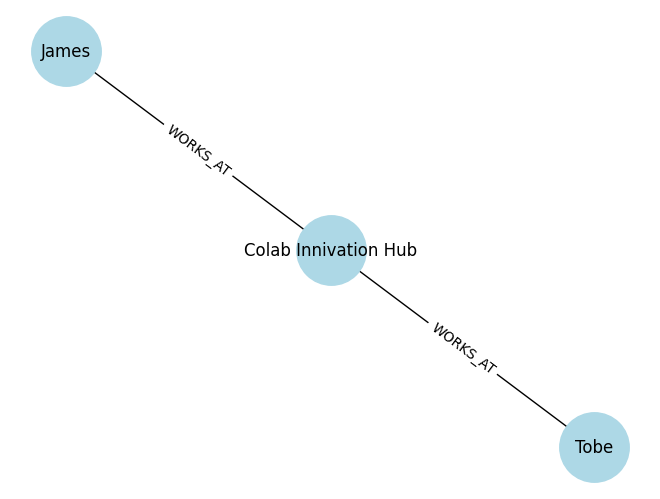

In [12]:
# Layout and draw
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500)

# Add edge labels
labels = {(u, v): d["relation"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

#### **Note: that the above is an undirected graph.**

### **4. Graph Algorithms**

`networkx` provides a rich set of built-in algorithms.

#### 1. Shortest Path

In [13]:
G_1 = nx.Graph()
G_1.add_edges_from([("A", "B"), ("B", "C"), ("A", "C")])
print(nx.shortest_path(G_1, "A", "C"))

['A', 'C']


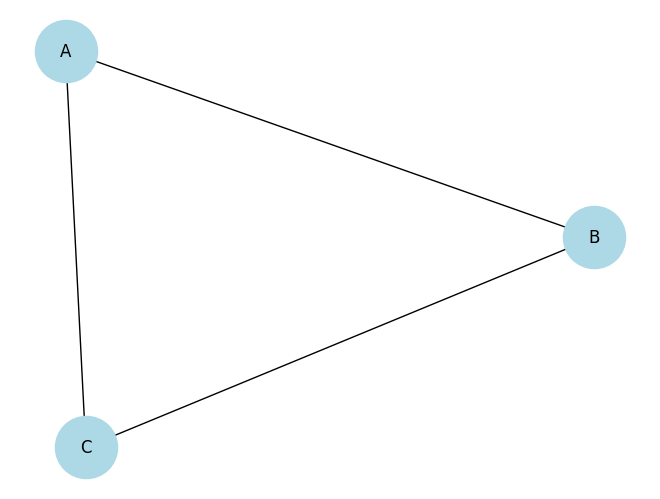

In [17]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G_1)
edge_labels = {(u, v): d.get("relation", "") for u, v, d in G_1.edges(data=True)}

nx.draw(G_1, pos, with_labels=True, node_color="lightblue", node_size=2000)
nx.draw_networkx_edge_labels(G_1, pos, edge_labels=edge_labels)
plt.show()

#### 2. Degree and Centrality


In [14]:
print(dict(G_1.degree()))             # Node degrees
print(nx.degree_centrality(G_1))      # Degree centrality
print(nx.betweenness_centrality(G_1)) # Betweenness centrality

{'A': 2, 'B': 2, 'C': 2}
{'A': 1.0, 'B': 1.0, 'C': 1.0}
{'A': 0.0, 'B': 0.0, 'C': 0.0}


 1. `dict(G_1.degree())` → **Node Degree**

* **Degree** = The number of edges connected to a node.

  * In an **undirected graph**, it’s just the count of connections.
  * In a **directed graph**, there are:

    * **In-degree**: edges coming into the node.
    * **Out-degree**: edges going out of the node.

Here:

* `A`, `B`, and `C` each have **2 connections**.
  This implies each node is connected to the other two (a triangle graph).


 2. `nx.degree_centrality(G_1)` → **Degree Centrality**

* **Degree Centrality** measures **how connected a node is relative to all other nodes** in the graph.
* Formula:

  $$
  \text{Degree Centrality}(v) = \frac{\text{Degree of node v}}{N - 1}
  $$

  where $N$ is the total number of nodes.

For the above graph:

* Each node has degree 2.
* $N = 3$ nodes.

$$
\frac{2}{3-1} = 1.0
$$

So every node is fully connected to all the others → **perfect centrality**.


 3. `nx.betweenness_centrality(G_1)` → **Betweenness Centrality**

* **Betweenness Centrality** measures how often a node lies **on the shortest path between other nodes**.
* Formula:

  $$
  \text{Betweenness Centrality}(v) = \sum_{s \neq v \neq t} \frac{\text{Shortest paths through v}}{\text{Total shortest paths between s and t}}
  $$

For your graph:

* Every node is directly connected to every other node (it's a triangle).
* There are **no "intermediate" nodes** needed for shortest paths.
* Therefore, betweenness centrality is `0.0` for all nodes.


#### Visual Representation

```markdown
A ── B
 \  /
  C
```

* Every node is equally connected.
* No node acts as a bridge between others.

**Summary of Metrics**

| Metric                | Meaning                                                             | Example Result |
| --------------------- | ------------------------------------------------------------------- | -------------- |
| **Degree**            | Number of edges connected to a node.                                | A: 2           |
| **Degree Centrality** | How connected a node is relative to all others (normalized).        | A: 1.0         |
| **Betweenness**       | How often a node acts as a bridge in shortest paths between others. | A: 0.0         |

#### 3. Connected Components


In [15]:
print(list(nx.connected_components(G_1)))


[{'A', 'C', 'B'}]


### Limitations of `networkx` for Knowledge Graphs

* No native RDF or SPARQL support
* No ontology reasoning
* Memory-based (not suitable for very large graphs)
* No built-in schema enforcement

**Solution:** For production, use **Neo4j** (property graph) or **GraphDB/Stardog** (RDF), but `networkx` is perfect for **teaching, prototyping, and algorithmic experimentation**.

### **References**

* [NetworkX Documentation](https://networkx.org/)
* [Neo4j Knowledge Graph Guide](https://neo4j.com/knowledge-graph/)
* [Hogan et al. (2021) – Knowledge Graphs](https://arxiv.org/abs/2003.02320)
* [Ontotext: Building Knowledge Graphs](https://www.ontotext.com/knowledgehub/fundamentals/what-is-a-knowledge-graph/)